### Iris Plant Dataset using KNN classifier, Random Forest, Decision Tree, Support Vector Classifier (SVC) & Gaussian Naive Bayes Classifier Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', header=None)

In [6]:
df.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Rename the columns
df.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [8]:
df.head(2)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Credit Amount vs Age')

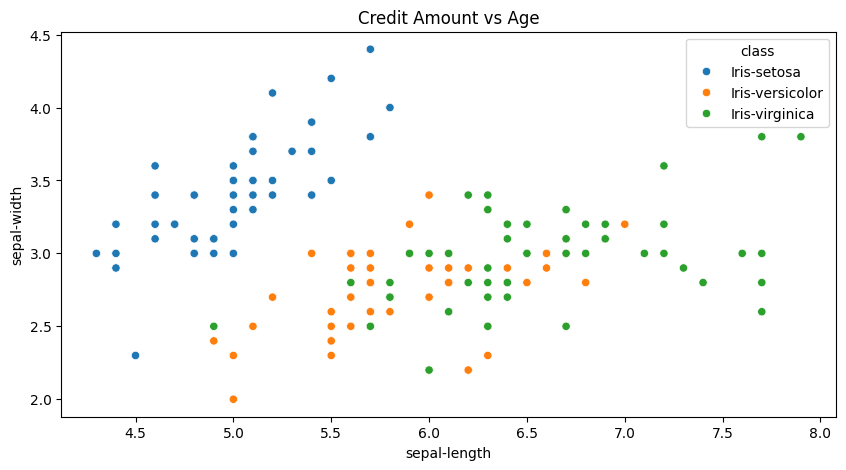

In [27]:
plt.figure(figsize=(10,5))
sn.scatterplot(data = df, x=df["sepal-length"], y=df["sepal-width"], hue=df["class"])
plt.title("Credit Amount vs Age")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#Get your columns and split the dataset first before scaling and then fit and transform only the training dataset, transform the test data
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=7)

### Using Logistic Regression Estimator

In [16]:
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=15) # 'ovr' is for multi-class
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)

print('Logistic Regression Accuracy:', accuracy) #OR it can be written in a single line print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred)
print('Logistic Regression Confusion Matrix:\n', con_matrix) # ORprint('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.868421052631579
Logistic Regression Confusion Matrix:
 [[11  0  0]
 [ 0 10  4]
 [ 0  1 12]]


### Using K-Nearest Neighbors (KNN) Estimators

In [18]:
modelKNN= KNeighborsClassifier(n_neighbors = 5) #k values should always be odd numbers
modelKNN.fit(X_train, y_train)
y_predKNN = modelKNN.predict(X_test)

print('KNN Accuracy (k=5):', accuracy_score(y_test, y_predKNN)) 
print('KNN Confusion Matrix:\n', confusion_matrix(y_test, y_predKNN)) 

KNN Accuracy (k=5): 0.8947368421052632
KNN Confusion Matrix:
 [[11  0  0]
 [ 0 13  1]
 [ 0  3 10]]


### Using Decision Tree 

In [19]:
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 1000)
modelTree.fit(X_train, y_train)
y_predT = modelTree.predict(X_test)
accuracyT = accuracy_score(y_test, y_predT)
con_matrixT = confusion_matrix(y_test, y_predT)

print('Decision Tree Accuracy:', accuracyT) 
print('Decision Tree Matrix:\n', con_matrixT) 

Decision Tree Accuracy: 0.9210526315789473
Decision Tree Matrix:
 [[11  0  0]
 [ 0 12  2]
 [ 0  1 12]]


### Using Random Forest

In [21]:
from sklearn.tree import DecisionTreeClassifier
modelRF = RandomForestClassifier(n_estimators = 10, bootstrap = True)
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)
accuracyRF = accuracy_score(y_test, y_predRF)
con_matrixRF= confusion_matrix(y_test, y_predRF)

print('Random Forest Accuracy:', accuracyRF) 
print('Random Forest Matrix:\n', con_matrixRF) 

Random Forest Accuracy: 0.8947368421052632
Random Forest Matrix:
 [[11  0  0]
 [ 0 12  2]
 [ 0  2 11]]


### Using SVC Model Estimator

In [17]:
modelsvc = SVC(kernel = 'linear', C=1.0, random_state=15)  #using linear kernel, C=1.0
modelsvc.fit(X_train, y_train)
y_predsvc = modelsvc.predict(X_test)
scoresvc = modelsvc.score(X_test, y_test)

print('SVM Accuracy (Linear Kernel):', accuracy_score(y_test, y_predsvc))
print('SVM Confision Matrix (Linear Kernel):\n', confusion_matrix(y_test, y_predsvc))

SVM Accuracy (Linear Kernel): 0.9736842105263158
SVM Confision Matrix (Linear Kernel):
 [[11  0  0]
 [ 0 13  1]
 [ 0  0 13]]


### Using Gaussian Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
modelnb.fit(X_train, y_train)
y_prednb = modelnb.predict(X_test)
scorenb = modelnb.score(X_test, y_test)

print('Naive Bayes Accuracy:', accuracy_score(y_test, y_prednb))
print('Naive Bayes Confusion Matrix:\n', confusion_matrix(y_test, y_prednb))

Naive Bayes Accuracy: 0.868421052631579
Naive Bayes Confusion Matrix:
 [[11  0  0]
 [ 0 11  3]
 [ 0  2 11]]


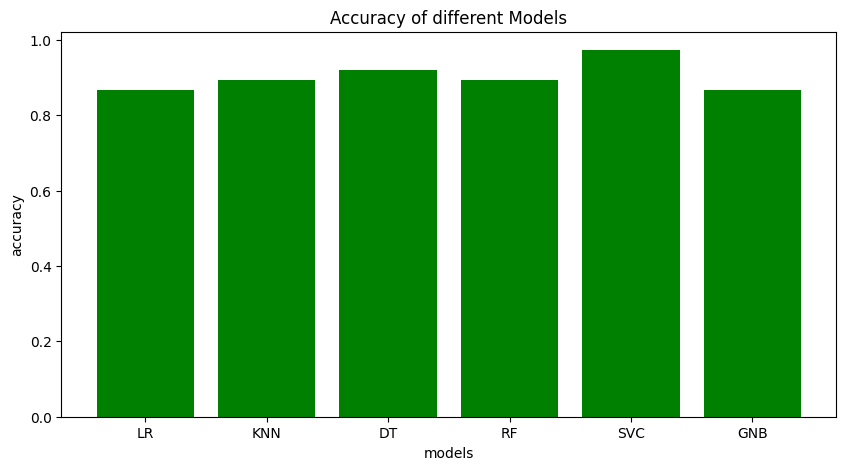

In [23]:
models = ["LR",  "KNN", "DT", "RF", "SVC", "GNB"]
accuracy =[0.868, 0.894, 0.921, 0.894, 0.973, 0.868 ]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color="green")
plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("Accuracy of different Models")
plt.show()